## Generating randomized parameter sets

In [13]:
## Import all the packages here 

from biocrnpyler import *
from bioscrape.types import Model


import pandas as pd
import numpy as np
from Parameters import Parameters # function to generate Parameters object with defined bounds
from RunModel import run_CRN_model # function to initialize Bioscrape model and simulate it using bioscrape
from matplotlib import style
import matplotlib.pyplot as plt
from numpy.random import RandomState

plt.rcParams["font.family"] = "arial"
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [14]:
## Import the model and define the timescale 

model_degtag = Model(sbml_filename = 'Biocrnpyler_model_degtag_030225.xml')
model_no_tag = Model(sbml_filename = 'Biocrnpyler_model_no_degtag_030225.xml')

N_steps = 1000
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)

tf_I = 720  # Time till we want to plot the simulation 

In [15]:
# Load the parameter file 
p = pd.read_csv('model_param_file_030525.csv').to_numpy()
p = p[:,2]

params = Parameters()

params.add_parameter(name = 'n_gamma_RNAP', value = p[0], min_bound = 0.01, max_bound = 0.9)
params.add_parameter(name = 'n_gamma_Et', value = p[1], min_bound= 0.01, max_bound = 0.9)
params.add_parameter(name = 'n_gamma_tRNA', value = p[2]*1 , min_bound = 0.01, max_bound = 0.9)
params.add_parameter(name = 'n_gamma_Ribo', value = p[3]*1, min_bound = 0.01, max_bound = 0.9)
params.add_parameter(name = 'n_gamma_Protease', value = p[4]*1, min_bound = 0.01, max_bound = 0.9)

params.add_parameter(name = "Sigma_IC", value = p[5], min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = "NT_IC", value = p[6]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = "RNAase_IC", value = p[7]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = "AA_IC", value = p[8]*1, min_bound = 1e1, max_bound = 1e6)

params.add_parameter(name = "Ribo_max", value = p[9]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = "tRNA_max", value = p[10]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = "RNAP_max", value = p[11]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = "Et_max", value = p[12]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = "Protease_max", value = p[13]*1, min_bound = 1e1, max_bound = 1e4)


params.add_parameter(name = 'k_tx_1b', value = p[14]*1, min_bound = 1*1e-3, max_bound = 1*1e-1)
params.add_parameter(name = 'k_tx_1u', value = p[15], min_bound = 3.71, max_bound = 37.1)
params.add_parameter(name = 'k_tx_2b', value = p[16]*1 , min_bound = 1.94e-4, max_bound = 1.94e-3)
params.add_parameter(name = 'k_tx_2u', value = p[17]*1, min_bound = 0.01, max_bound = 0.1)
params.add_parameter(name = 'k_tx_3', value = p[18]*1, min_bound = 0.001, max_bound = 0.0036)
params.add_parameter(name = 'k_tx_4b', value = p[19], min_bound = 0.1, max_bound = 5)
params.add_parameter(name = 'k_tx_4u', value = p[20]*1, min_bound = 100, max_bound = 200)
params.add_parameter(name = 'k_tx_5', value = p[21]*1, min_bound = 0.1, max_bound = 10)

params.add_parameter(name = 'k_tl_1b', value = p[22], min_bound = 1e-3, max_bound = 1e1)
params.add_parameter(name = 'k_tl_1u', value = p[23], min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = 'k_tl_2b', value = p[25], min_bound = 1e-3, max_bound = 1e1)
params.add_parameter(name = 'k_tl_3b', value = p[26]*1,  min_bound = 1e-3, max_bound = 1e0)
params.add_parameter(name = 'k_tl_3u', value = p[27]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = 'k_tl_4', value = p[28]*1, min_bound = 0.05, max_bound = 1)
params.add_parameter(name = 'k_tl_5', value = p[29]*1, min_bound = 0.1, max_bound = 0.3)
params.add_parameter(name = "b_tl_5", value = p[30]*1, min_bound = 0, max_bound = 1)
params.add_parameter(name = 'k_tl_6', value = p[31]*1, min_bound = 0.01, max_bound = 10)
params.add_parameter(name = 'k_tl_7', value = p[32]*1, min_bound = 0.0005, max_bound = 0.01)
params.add_parameter(name = 'k_tl_8', value = p[33]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = 'k_tl_9b_P', value = p[34]*1, min_bound = 1e-4, max_bound = 1e1)
params.add_parameter(name = 'k_tl_9b_Pm', value = p[35]*1, min_bound = 1e-4, max_bound = 1e1)
params.add_parameter(name = 'k_tl_9u', value = p[36]*1, min_bound = 1e1, max_bound = 1e4)
params.add_parameter(name = 'k_tl_10', value = p[37]*1, min_bound = 1e-4, max_bound = 1e0)
params.add_parameter(name = 'n_gamma_folding', value = p[38]*1, min_bound = 0.01, max_bound= 0.9)
params.add_parameter(name = 'n_gamma_syn', value = p[39]*1, min_bound = 0.01, max_bound = 0.9)

params.add_parameter(name = 'C_max', value = p[40])
params.add_parameter(name = "C_0", value = p[41])
params.add_parameter(name = "k_gr", value = p[42])


sol_deg, sol_no_deg = run_CRN_model(params, model_degtag, model_no_tag, timepoints)


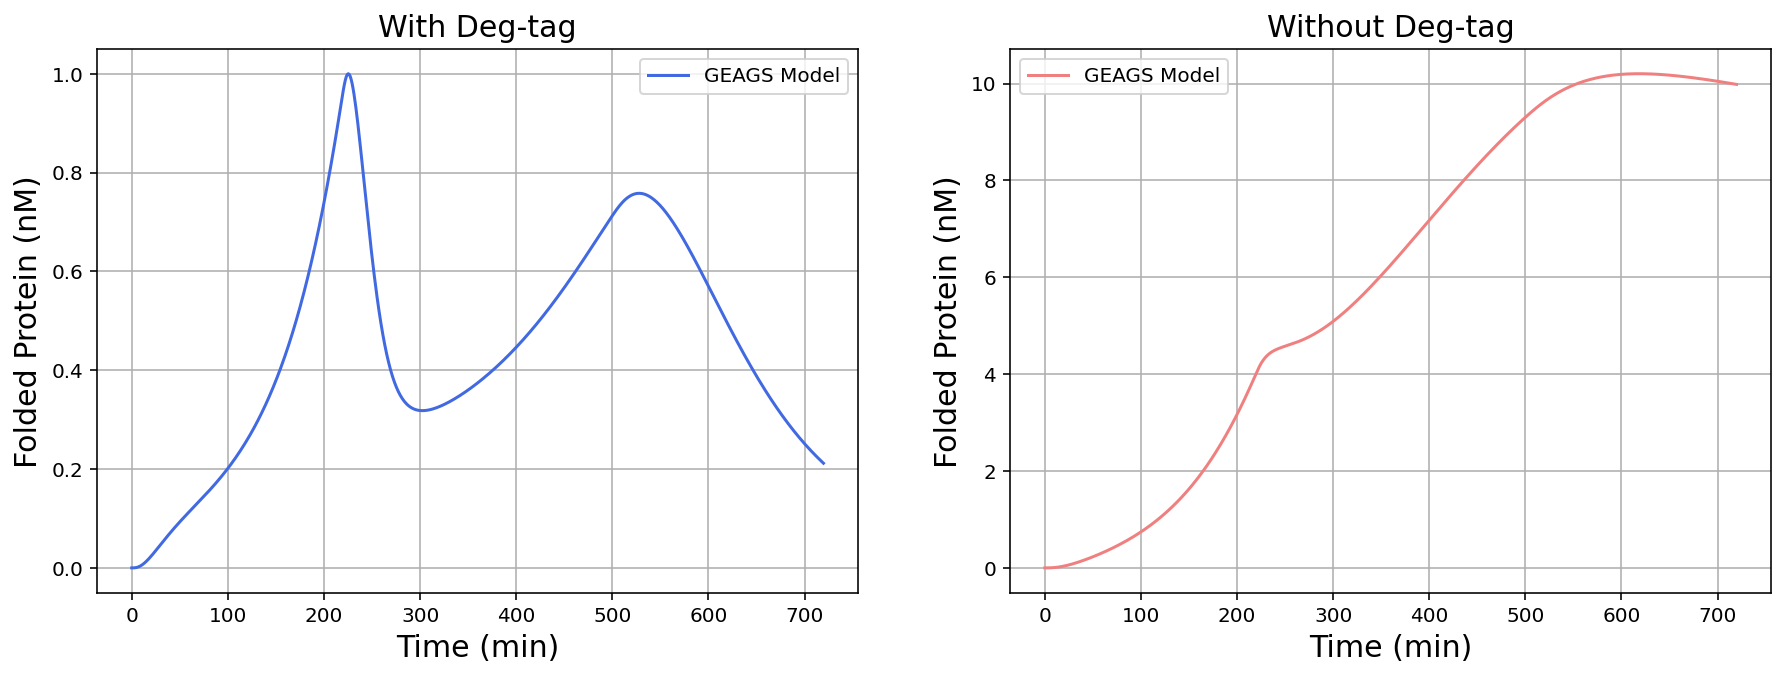

In [16]:
## Plot protein profile for checking the parameters 

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)

last_ind = -1
i = 0
ax[i].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'royalblue')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('With Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()

i = 1
ax[i].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'lightcoral')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('Without Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()


### Generating an array of parameters that we want to randomize

In [17]:
to_be_rand_params_array = np.zeros(len(p))
to_be_rand_params_array[:] = p

Generating array of random parameters (for IC)

In [18]:
N = 1000 # Number of sets of parameters we want
Np = len(to_be_rand_params_array) # Number of parameters we have 
parameter_set_IC = np.zeros((Np,N))
interval = 0.50 # Means the interval about parameter which we want uniform distribution. 0.15 means [p - 0.15*p, p + p*0.15)

# To ensure same set of random numbers are produced 
rand = RandomState(1)

two_peak_essential_params_ind = [5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 21, 26, 27, 31, 33, 40, 41, 42]

two_peak_non_essential_params_ind = [12, 8, 15, 18, 19, 20, 28, 29, 30, 35, 36, 41]

two_peak_non_essential_less_sens_params_ind = [17, 22, 23, 25, 32, 34, 37]

for i in range(Np):
    P = to_be_rand_params_array[i]
    
    ## generating a uniform distribution about the parameters we want to analyze closely 

    if i in two_peak_non_essential_less_sens_params_ind: # modify the index array accordingly
        low_P = P * (1 - interval)
        high_P = P * (1 + interval)
        set_P = rand.uniform(low = low_P, high = high_P, size = (1,N))
        parameter_set_IC[i,:] = set_P
    
    else:
        # This if statement filters out the parameters we want to keep constant 
        interval_new =  0
        low_P = P * (1 - interval_new)
        high_P = P * (1 + interval_new)
        set_P = rand.uniform(low = low_P, high = high_P, size = (1,N))
        parameter_set_IC[i,:] = set_P

np.shape(parameter_set_IC)
len(two_peak_essential_params_ind)+len(two_peak_non_essential_params_ind)+len(two_peak_non_essential_less_sens_params_ind)

37

In [19]:
# # Visualize random initialization 
# # Can skip this step as it takes some time

# random_IC_sol_deg = np.zeros((N, N_steps))
# random_IC_sol_no_deg = np.zeros((N, N_steps))

# for i in range(N): 

#     rand_params = Parameters() # Parameters to be randomized 

#     rand_params.add_parameter(name = 'n_gamma_RNAP', value = parameter_set_IC[0,i], min_bound = 0.01, max_bound = 0.9)
#     rand_params.add_parameter(name = 'n_gamma_Et', value = parameter_set_IC[1,i], min_bound= 0.01, max_bound = 0.9)
#     rand_params.add_parameter(name = 'n_gamma_tRNA', value = parameter_set_IC[2,i]*1 , min_bound = 0.01, max_bound = 0.9)
#     rand_params.add_parameter(name = 'n_gamma_Ribo', value = parameter_set_IC[3,i]*1, min_bound = 0.01, max_bound = 0.9)
#     rand_params.add_parameter(name = 'n_gamma_Protease', value = parameter_set_IC[4,i]*1, min_bound = 0.01, max_bound = 0.9)

#     rand_params.add_parameter(name = "Sigma_IC", value = parameter_set_IC[5,i], min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = "NT_IC", value = parameter_set_IC[6,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = "RNAase_IC", value = parameter_set_IC[7,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = "AA_IC", value = parameter_set_IC[8,i]*1, min_bound = 1e1, max_bound = 1e6)

#     rand_params.add_parameter(name = "Ribo_max", value = parameter_set_IC[9,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = "tRNA_max", value = parameter_set_IC[10,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = "RNAP_max", value = parameter_set_IC[11,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = "Et_max", value = parameter_set_IC[12,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = "Protease_max", value = parameter_set_IC[13,i]*1, min_bound = 1e1, max_bound = 1e4)


#     rand_params.add_parameter(name = 'k_tx_1b', value = parameter_set_IC[14,i]*1, min_bound = 1*1e-3, max_bound = 1*1e-1)
#     rand_params.add_parameter(name = 'k_tx_1u', value = parameter_set_IC[15,i], min_bound = 3.71, max_bound = 37.1)
#     rand_params.add_parameter(name = 'k_tx_2b', value = parameter_set_IC[16,i]*1 , min_bound = 1.94e-4, max_bound = 1.94e-3)
#     rand_params.add_parameter(name = 'k_tx_2u', value = parameter_set_IC[17,i]*1, min_bound = 0.01, max_bound = 0.1)
#     rand_params.add_parameter(name = 'k_tx_3', value = parameter_set_IC[18,i]*1, min_bound = 0.001, max_bound = 0.0036)
#     rand_params.add_parameter(name = 'k_tx_4b', value = parameter_set_IC[19,i], min_bound = 0.1, max_bound = 5)
#     rand_params.add_parameter(name = 'k_tx_4u', value = parameter_set_IC[20,i]*1, min_bound = 100, max_bound = 200)
#     rand_params.add_parameter(name = 'k_tx_5', value = parameter_set_IC[21,i]*1, min_bound = 0.1, max_bound = 10)

#     rand_params.add_parameter(name = 'k_tl_1b', value = parameter_set_IC[22,i], min_bound = 1e-3, max_bound = 1e1)
#     rand_params.add_parameter(name = 'k_tl_1u', value = parameter_set_IC[23,i], min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = 'k_tl_2u', value = parameter_set_IC[24,i],  min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = 'k_tl_2b', value = parameter_set_IC[25,i], min_bound = 1e-3, max_bound = 1e1)
#     rand_params.add_parameter(name = 'k_tl_3b', value = parameter_set_IC[26,i]*1,  min_bound = 1e-3, max_bound = 1e0)
#     rand_params.add_parameter(name = 'k_tl_3u', value = parameter_set_IC[27,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = 'k_tl_4', value = parameter_set_IC[28,i]*1, min_bound = 0.05, max_bound = 1)
#     rand_params.add_parameter(name = 'k_tl_5', value = parameter_set_IC[29,i]*1, min_bound = 0.1, max_bound = 0.3)
#     rand_params.add_parameter(name = "b_tl_5", value = parameter_set_IC[30,i]*1, min_bound = 0, max_bound = 1)
#     rand_params.add_parameter(name = 'k_tl_6', value = parameter_set_IC[31,i]*1, min_bound = 0.01, max_bound = 10)
#     rand_params.add_parameter(name = 'k_tl_7', value = parameter_set_IC[32,i]*1, min_bound = 0.0005, max_bound = 0.01)
#     rand_params.add_parameter(name = 'k_tl_8', value = parameter_set_IC[33,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = 'k_tl_9b_P', value = parameter_set_IC[34,i]*1, min_bound = 1e-4, max_bound = 1e1)
#     rand_params.add_parameter(name = 'k_tl_9b_Pm', value = parameter_set_IC[35,i]*1, min_bound = 1e-4, max_bound = 1e1)
#     rand_params.add_parameter(name = 'k_tl_9u', value = parameter_set_IC[36,i]*1, min_bound = 1e1, max_bound = 1e4)
#     rand_params.add_parameter(name = 'k_tl_10', value = parameter_set_IC[37,i]*1, min_bound = 1e-4, max_bound = 1e0)
#     rand_params.add_parameter(name = 'n_gamma_folding', value = parameter_set_IC[38,i]*1, min_bound = 0.01, max_bound= 0.9)
#     rand_params.add_parameter(name = 'n_gamma_syn', value = parameter_set_IC[39,i]*1, min_bound = 0.01, max_bound = 0.9)

#     rand_params.add_parameter(name = 'C_max', value = parameter_set_IC[40,i])
#     rand_params.add_parameter(name = "C_0", value = parameter_set_IC[41,i])
#     rand_params.add_parameter(name = "k_gr", value = parameter_set_IC[42,i])

#     sol_deg_rand, sol_no_deg_rand = run_CRN_model(rand_params, model_degtag, model_no_tag, timepoints)

#     random_IC_sol_deg[i,:] = sol_deg_rand['protein_X']
#     random_IC_sol_no_deg[i,:] = sol_no_deg_rand['protein_X']

In [20]:
## Visualising the randomly generated trajectories 

# fig,ax = plt.subplots(1,2, figsize = (15,5))
# fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

# # Create a colormap to generate a sequence of distinct colors
# colormap = plt.cm.get_cmap('jet', N)
# alpha = 0.15
# for i in range(N): 

#     ax[0].plot(timepoints[:tf_I], random_IC_sol_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'royalblue', alpha = alpha)
    
#     ax[0].set_xlabel('Time (min)') ; ax[0].set_ylabel('Protein (nM)') ; 
#     ax[0].set_title('With deg-tag')
#     ax[0].grid(True) ; 

#     ax[1].plot(timepoints[:tf_I], random_IC_sol_no_deg[i, :][:tf_I]/np.max(sol_deg['protein_X']), color = 'lightcoral', alpha = alpha)
#     ax[1].set_xlabel('Time (min)') ; ax[1].set_ylabel('Protein (nM)') ; 
    
#     ax[1].set_title('Without deg-tag')
#     ax[1].grid(True) ; 


# ax[0].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'Model')
# ax[0].legend()


# ax[1].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '--', color = 'black', label = 'Model')
# ax[1].legend()

# ax[0].grid(True)
# ax[1].grid(True)

In [22]:
## Storing the randomly generated parameter sets

# param_array = parameter_set_IC
# param_data = pd.DataFrame(param_array)
# param_data.to_csv("random_parameter_1000_sets_040325_two_peak_non_essential_less_sens_params_vary_50.csv")